In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
# Carica il dataset
cifar10 = tf.keras.datasets.cifar10

# Separa training set e test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
# Standardizza il valore dei pixel
#x_train, x_test = x_train / 255, x_test / 255
#print(x_train.shape)
#print(x_test.shape)

# flatten 
#y_train, y_test = y_train.flatten(), y_test.flatten()

In [4]:
class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


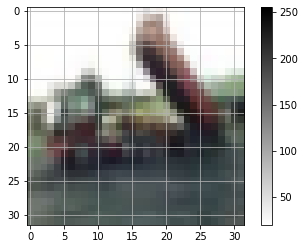

Class ID: [9] and Class name: Truck


In [5]:
index=2 # change this number 
plt.imshow(x_train[index], cmap=plt.cm.binary) # printing 10th image. You may use cmap='gray'
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()
print("Class ID: %s and Class name: %s" % (y_train[index], class_names[y_train[index][0]]))

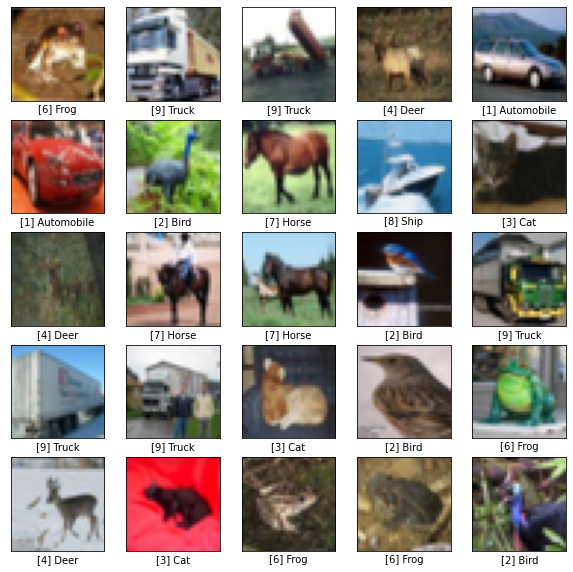

In [6]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary) # printing binary/black and white image
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
  plt.xlabel("%s %s" % (y_train[i], class_names[y_train[i][0]])) # Assigning name to each image
plt.show()

In [8]:
# Standardizza il valore dei pixel
x_train, x_test = x_train / 255, x_test / 255
print(x_train.shape)
print(x_test.shape)

# flatten 
y_train, y_test = y_train.flatten(), y_test.flatten()

(50000, 32, 32, 3)
(10000, 32, 32, 3)


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

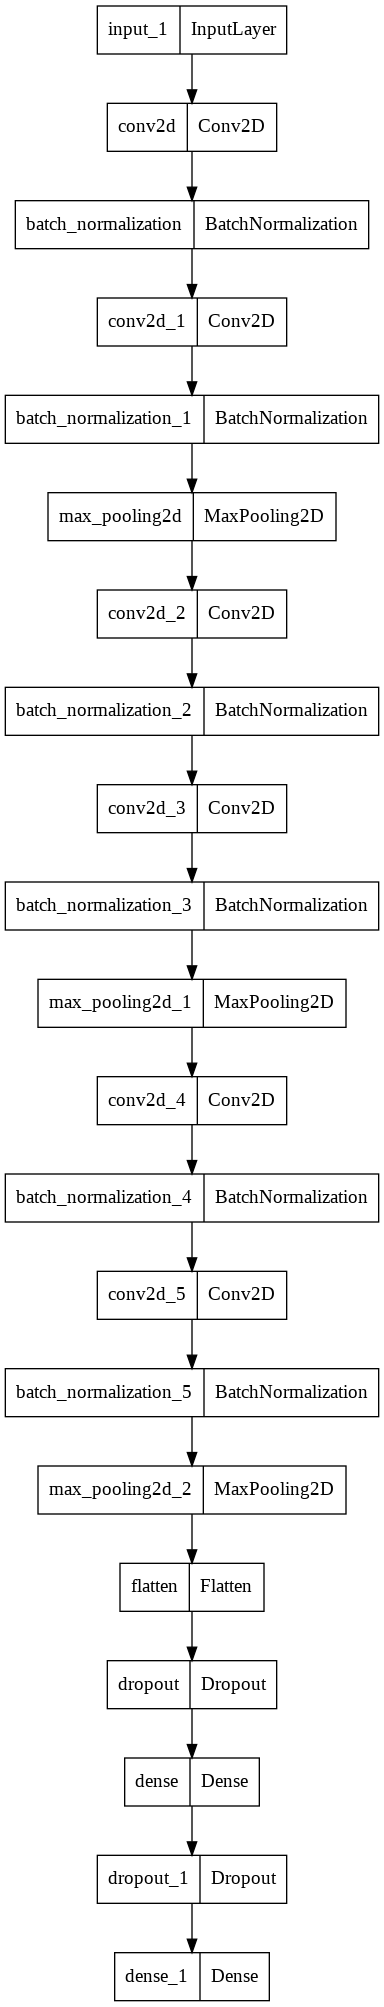

In [9]:
# numero delle classi
K = len(set(y_train.flatten()))

# stampa il numero totale delle classi per ogni layer di output
print("number of classes:", K)

# costruzione del modello
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# descrizione del modello
model.summary()

plot_model(model)

In [10]:
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

In [35]:
# Fit (standard)
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1944 - accuracy: 0.9323 - val_loss: 0.6666 - val_accuracy: 0.8197
Epoch 2/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1701 - accuracy: 0.9420 - val_loss: 0.6601 - val_accuracy: 0.8272
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1597 - accuracy: 0.9455 - val_loss: 0.6941 - val_accuracy: 0.8268
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1524 - accuracy: 0.9491 - val_loss: 0.6721 - val_accuracy: 0.8286
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1255 - accuracy: 0.9566 - val_loss: 0.7138 - val_accuracy: 0.8200
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1239 - accuracy: 0.9580 - val_loss: 0.7706 - val_accuracy: 0.8174
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1126 - accuracy: 0.9628 - val_loss: 0.7613 - val_ac

In [65]:
# Fit con data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=40)

Epoch 1/40
1562/1562 [==============================] - 33s 21ms/step - loss: 0.5554 - accuracy: 0.8260 - val_loss: 0.5138 - val_accuracy: 0.8350
Epoch 2/40
1562/1562 [==============================] - 33s 21ms/step - loss: 0.4414 - accuracy: 0.8557 - val_loss: 0.4657 - val_accuracy: 0.8483
Epoch 3/40
1562/1562 [==============================] - 32s 21ms/step - loss: 0.4102 - accuracy: 0.8645 - val_loss: 0.4764 - val_accuracy: 0.8488
Epoch 4/40
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3842 - accuracy: 0.8737 - val_loss: 0.4721 - val_accuracy: 0.8445
Epoch 5/40
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3682 - accuracy: 0.8780 - val_loss: 0.4438 - val_accuracy: 0.8563
Epoch 6/40
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3562 - accuracy: 0.8806 - val_loss: 0.4893 - val_accuracy: 0.8486
Epoch 7/40
1562/1562 [==============================] - 33s 21ms/step - loss: 0.3452 - accuracy: 0.8839 - val_loss: 0.4253 -

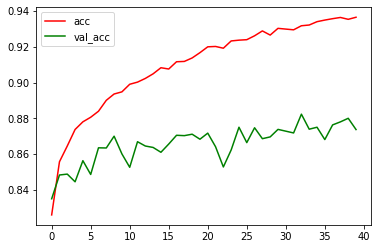

In [66]:
# stampa il grafico con accuracy/validarion_accuracy
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 0s 18ms/step
Original label : Automobile - Predicted label : Automobile



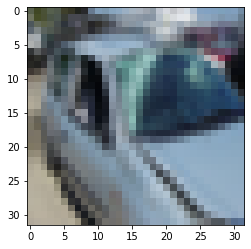

In [69]:
# seleziona un'immagine random dal dataset di test
import random
image_number = random.randint(0,9999)	

# stampa l'immagine
plt.imshow(x_test[image_number])

# carica l'immagine in un array
n = np.array(x_test[image_number])

# reshape l'immagine
p = n.reshape(1, 32, 32, 3)

# passa l'immagine nella rete e salva il valore predicted
predicted_label = class_names[model.predict(p).argmax()]

# carica il laber originale
original_label = class_names[y_test[image_number]]

# stampa il risultato
print("Original label : {} - Predicted label : {}\n".format(
	original_label, predicted_label))